# **Artificial Inteligence Module - Coursework 2** 

**David Cardoso | January 2022**


---


### **Table of Contents**

* [Introduction](#introduction)

* [Methodology](#methodology)
    * [Part 1: Defining the problem and assemblance of the dataset](#part1)

    * [Part 2: Choosing a measure of success](#part2)

    * [Part 3: Deciding on an evaluation protocol](#part3)

    * [Part 4: Preparing the data](#part4)

    * [Part 5: Better than a baseline](#part5)
        * [Baseline mode](#basemodel)
    * [Part 6: Scaling up](#part6)

    * [Part 7: Regularizing and tuning](#part7)

      * [Batch normalization model](#batch)

      * [Dropout](#drop)
        * [Drop1 Model (20%)](#drop1model)
        * [Drop2 Model (40%)](#drop2model)
        * [Dropout models comparison](#dropcomparison)

      * [Tunning the learning rate](#learning)
        * [LR1 Model (0.005)](#lr1model)
        * [LR2 Model (0.1](#lr2model)
        * [Learning rate models comparison](#learncomparison)

* [Results comparison](#results)
  * [Final model](#finalmodel)

* [Conclusion](#conclusion)
* [References](#references)

------

    

# **Introduction** <a class="anchor" id="introduction"></a>

In this second deep learning TensorFlow project I intend to expand my knowledge, more specifically on deep learning computer vision. The first use in real world of computer vision was on a digital image scanner back in 1957 and only 2 years later an influential CV paper named “Receptive fields of single neurons in the cat’s striate cortex” was published by two neurophysiologists. In this paper David Hubel and Torsten Wiesel described “core response properties of visual cortical neurons as well how a cat’s visual experience shapes its cortical architecture” [1], helping to promote and settle the base of is nowadays a well spread technology. 

Computer vision is a “field of AI that enables computers and systems to derive meaningful information from digital images, videos and other visual inputs”.[2] Even though visual identification is a feature present in humans even before the birth, for computers this can be a daunting task. In the last decades computer vision evolved so much that nowadays the most average smartphone has access to apps such as Google Lens where computer vision is used to identify objects, localization, animals and even distinguish human faces.

In this coursework, my aim is solve a computer vision classification problem. For this I will apply the 7 steps of the universal workflow of deep learning as presented in “Deep Learning with Python” by François Chollet [3]:

1.	Defining the problem and assembling a dataset.
2.	Choosing a measure of success.
3.	Deciding on an evaluation protocol.
4.	Preparing your data.
5.	Developing a model that does better than a baseline.
6.	Scaling up: Developing a model that overfits.
7.	Regularizing your model and tuning your hyperparameters.





# **Methodology** <a class="anchor" id="methodology"></a>


###**Part 1 - Defining the problem and assemblance of the dataset** <a class="anchor" id="part1"></a>

For this coursework I will use the facial expressions dataset from Manas Sambare: https://www.kaggle.com/msambare/fer2013
This dataset is composed of 48x48 pixel grayscale images of faces with emotion shown being one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set contains 31668 images, split into 28,709 training images and a public test set of 3589 images. The category of the emotion in a specific image will be determined by the neural network created.

An important aspect of this dataset is that its categories are uneven in quantity of data samples. The range of data samples per category ranges from 111 to 7215 images. This huge discrepancy will result in a unreliable result for the outcome is significantly inclined into a certain direction where it should be impartial. 
My solution is to find a common, and yet significant, number of images per emotion in order to create a new and balanced dataset.

My hypothesis for this multiclass single label classification problem is:

* the emotion can be sucessfully predicted, in another words the outputs can be sucessfullly predicted from the given inputs in the dataset.
* the dataset has enough data samples to successfully train and test a neural network capable of learning the connections between each input and the expected output.



---
### **Part 2 - Choosing a measure of success** <a class="anchor" id="part2"></a>

In order to evaluate the success of my model, I first need to address how to measure it. Since this is a multiclass single class classification, classification accuracy is the natural choice of measure of success. A consistent high classification accuracy score means that regularly the neural network will be effective in its task, therefore, successful. For this classification problem success measure, the lower the validation loss the better for the reason that it shows that the optimizer is, effectively, lowering the loss, thus ensuring correct predictions. Thus, I will be looking for the lowest the validation loss which is the closest the model prediction will be from the expected prediction.

A first inspection to the dataset showed that in some cases, an emotion would have up to 6 times more data samples than other emotions. This issue needs to be address when preparing the data, or else classification accuracy will always be limited, ineffective and far from a appropriate measure of sucess.


---
### **Part 3 - Deciding on an evaluation protocol** <a class="anchor" id="part3"></a>

The third part of the universal workflow is to decide on how to evaluate my current progress. The three most common evaluation protocols are:

* Hold-out validation
* K-fold cross-validation
* Iterated K-fold validation

The key difference in this three protocols is the required amount of data samples in order to work properly. With this dataset containing 31668 images, split into 28,709 training images and a public test set of 3589 images, I have chosen hold-out validation due to considering that this dataset has plenty of data samples.

As learned from my previous coursework and as explained by François Chollet in DLWP chapter 4.2, “a model must not be evaluated on the same data they were trained”; the goal is to achieve a model that generalize, performing well on never seen data. On the next part of the universal workflow I will implement this principle as showed in figure 4.1 in DLWP, page 98.

---
### **Part 4 - Preparing the data** <a class="anchor" id="part4"></a>
In this fourth part of the universal workflow, I will need to import the dataset from Kaggle. Since is not present in TensorFlow, please follow the instructions.

Firstly you will need to upload the API token that I have generated in Kaggle. Run the next block of code:

In [3]:
import os
 
os.environ['KAGGLE_USERNAME'] = 'osodracd'
os.environ['KAGGLE_KEY'] = '11a9863858d0062c2831af8daa9aad7a'
 
from kaggle.api.kaggle_api_extended import KaggleApi
 
api = KaggleApi()
api.authenticate()

ModuleNotFoundError: No module named 'kaggle'

After running the previous code block, click on *Choose files*. This will prompt a upload window where you need to locate, select and upload the kaggle.json file that I have attached to the zip file.

Once the file is visible in the folder tree on the left side, you can follow to the next block of code will updagre TensorFlow, install Kaggle, create Kaggle's directory, download the dataset and extract the data samples from the zip file.

In [2]:
# Tensorflow updgrade
!pip install --upgrade tensorflow
# Kaggle installation
! pip install kaggle
# Create Kaggle directory
! mkdir ~/.kaggle
# Copy the kaggle.json file into the current directory
! cp kaggle.json ~/.kaggle/
# provide owner full read and write access to the file
! chmod 600 ~/.kaggle/kaggle.json
# Download the dataset zip file
! kaggle datasets download msambare/fer2013
# Extract the files withtin the zip file
! unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

**Import libraries and modules**

Now that the dataset is downloaded and accessible, I will import all the necessary libraries and modules.

In [42]:
# Import statements
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense, Input, Dropout, Flatten, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization, Activation, Embedding, LSTM
from tensorflow.keras import models, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop

Set directories

In [5]:
# Directories 
train_dir = "/content/train"
test_dir = "/content/test"

Lets peek the dataset.

In [6]:
# Standardized size of images
picture_size = 48
folder_path = "/content/"

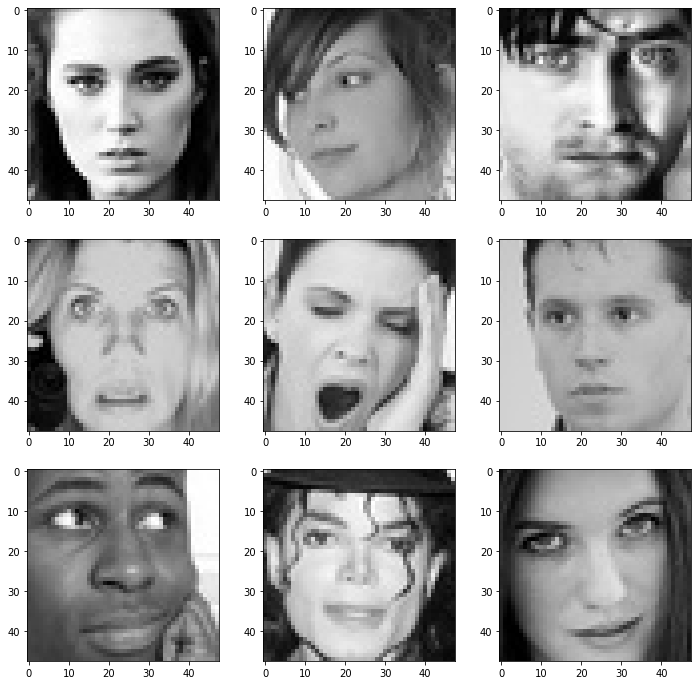

Example of neutral faces.


In [7]:
# Plotting neutral images from the folder
expression = "neutral"
# Defining mapplotlib graph
plt.figure(figsize=(12, 12))
# Plotting first 9 images
for i in range (1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path+"train/"+expression+"/" + os.listdir(folder_path+"train/"+expression)[i],target_size= (picture_size, picture_size))
    plt.imshow(img)
plt.show()
print('Example of ' + expression + ' faces.')

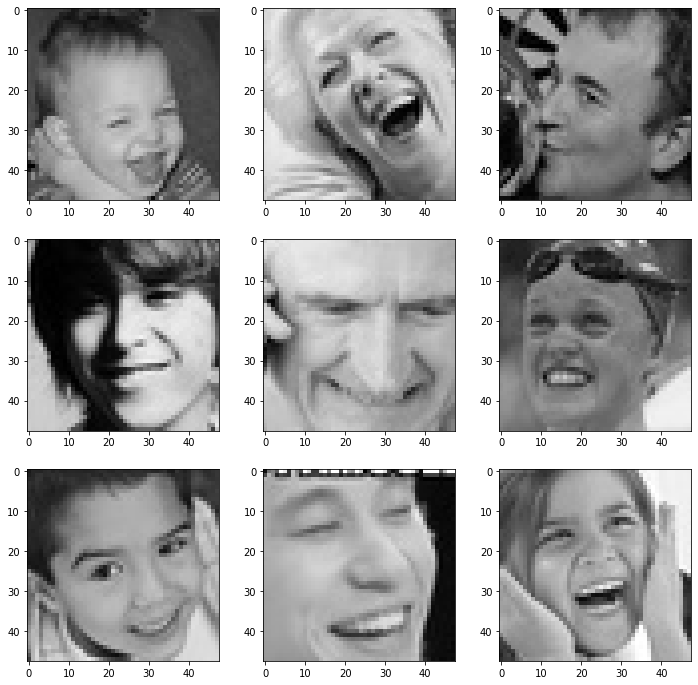

Example of happy faces.


In [8]:
# Test plotting for a different expression
expression = "happy"
# Defining mapplotlib graph
plt.figure(figsize=(12, 12))
# Plotting first 9 images
for i in range (1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path+"train/"+expression+"/" + os.listdir(folder_path+"train/"+expression)[i],target_size= (picture_size, picture_size))
    plt.imshow(img)
plt.show()
print('Example of ' + expression + ' faces.')

Now I will find the data distribuition among the different emotions.

In [9]:
#Train distribuition
train_angry_list = os.listdir('/content/train/angry')
train_disgust_list = os.listdir('/content/train/disgust')
train_fear_list = os.listdir('/content/train/fear')
train_happy_list = os.listdir('/content/train/happy')
train_neutral_list = os.listdir('/content/train/neutral')
train_sad_list = os.listdir('/content/train/sad')
train_surprise_list = os.listdir('/content/train/surprise')

train_angry_list = len(train_angry_list)
train_disgust_list = len(train_disgust_list)
train_fear_list = len(train_fear_list)
train_happy_list = len(train_happy_list)
train_neutral_list = len(train_neutral_list)
train_sad_list = len(train_sad_list)
train_surprise_list = len(train_surprise_list)

#Test distribuition
test_angry_list = os.listdir('/content/test/angry')
test_disgust_list = os.listdir('/content/test/disgust')
test_fear_list = os.listdir('/content/test/fear')
test_happy_list = os.listdir('/content/test/happy')
test_neutral_list = os.listdir('/content/test/neutral')
test_sad_list = os.listdir('/content/test/sad')
test_surprise_list = os.listdir('/content/test/surprise')

test_angry_list = len(test_angry_list)
test_disgust_list = len(test_disgust_list)
test_fear_list = len(test_fear_list)
test_happy_list = len(test_happy_list)
test_neutral_list = len(test_neutral_list)
test_sad_list = len(test_sad_list)
test_surprise_list = len(test_surprise_list)

print("****** Train set ******")
print("Number of angry images:    ", train_angry_list)
print("Number of disgust images:  ", train_disgust_list)
print("Number of fear images:     ", train_fear_list)
print("Number of happy images:    ", train_happy_list)
print("Number of neutral images:  ", train_neutral_list)
print("Number of sad images:      ", train_sad_list)
print("Number of surprise images: ", train_surprise_list)
print()
print("****** Test set ******")
print("Number of angry images:    ", test_angry_list)
print("Number of disgust images:  ", test_disgust_list)
print("Number of fear images:     ", test_fear_list)
print("Number of happy images:    ", test_happy_list)
print("Number of neutral images:  ", test_neutral_list)
print("Number of sad images:      ", test_sad_list)
print("Number of surprise images: ", test_surprise_list)

****** Train set ******
Number of angry images:     3995
Number of disgust images:   436
Number of fear images:      4097
Number of happy images:     7215
Number of neutral images:   4965
Number of sad images:       4830
Number of surprise images:  3171

****** Test set ******
Number of angry images:     958
Number of disgust images:   111
Number of fear images:      1024
Number of happy images:     1774
Number of neutral images:   1233
Number of sad images:       1247
Number of surprise images:  831


Through the analyse of the number of images per emotion, per set, it is clear that this dataset is unbalanced. The number of train images ranges between 436 and 7215, while the number of test images ranges between 111 and 1774. Additionally, the emotion with the lowest number of images is the same in both sets; by removing “disgust” from the training and testing sets, the number of training samples would increase from 3052 to 19.026 samples, assuming a balanced dataset. 

Thus, I have decided to eliminate the emotion “disgust”.

With the aim of producing a balanced dataset, I will use the same number of images per emotion within each set. In order to do so, I will create a new dataset, with new directories, extract from the original dataset into the new dataset the same number of images per emotion, per set. This way, the results will not be impartial and thus more reliable.  

Therefore, I follow Chollet teachings in DLWP chapter 4.2.1 and divide my new dataset into a train set and a test set. The distribution of all the data samples will be 80% - 20% respectively. The train set will then be divided into a partial train set and a validation set, with a data samples distribuition of 90% and 10% respectively.

I will now create the new dataset and all the necessary folders.

In [10]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 132)
# shutil module already imported above

# Create new dataset directory
balanced_dataset_dir = '/content/balanced_dataset'
os.mkdir(balanced_dataset_dir)

In [11]:
# Create subdirectory for training samples (partial training set + validation set samples)
train_dir = os.path.join(balanced_dataset_dir, 'train')
os.mkdir(train_dir)

# create subdirectory for partial training 
partialtrain_dir = os.path.join(balanced_dataset_dir, 'partialtrain')
os.mkdir(partialtrain_dir)

# create subdirectory for validation samples
validation_dir = os.path.join(balanced_dataset_dir, 'validation')
os.mkdir(validation_dir)

# Create subdirectory for test samples
test_dir = os.path.join(balanced_dataset_dir, 'test')
os.mkdir(test_dir)

In [12]:
# Create new training directories subfolders

# Angry
train_angry_dir = os.path.join(train_dir, 'angry')
os.mkdir(train_angry_dir)

# Fear 
train_fear_dir = os.path.join(train_dir, 'fear')
os.mkdir(train_fear_dir)

# Happy 
train_happy_dir = os.path.join(train_dir, 'happy')
os.mkdir(train_happy_dir)

# Neutral
train_neutral_dir = os.path.join(train_dir, 'neutral')
os.mkdir(train_neutral_dir)

# Sad 
train_sad_dir = os.path.join(train_dir, 'sad')
os.mkdir(train_sad_dir)

# Surprise
train_surprise_dir = os.path.join(train_dir, 'surprise')
os.mkdir(train_surprise_dir)

In [13]:
# Create partial train directories subfolders

# Angry
partialtrain_angry_dir = os.path.join(partialtrain_dir, 'angry')
os.mkdir(partialtrain_angry_dir)

# Fear 
partialtrain_fear_dir = os.path.join(partialtrain_dir, 'fear')
os.mkdir(partialtrain_fear_dir)

# Happy 
partialtrain_happy_dir = os.path.join(partialtrain_dir, 'happy')
os.mkdir(partialtrain_happy_dir)

# Neutral
partialtrain_neutral_dir = os.path.join(partialtrain_dir, 'neutral')
os.mkdir(partialtrain_neutral_dir)

# Sad 
partialtrain_sad_dir = os.path.join(partialtrain_dir, 'sad')
os.mkdir(partialtrain_sad_dir)

# Surprise
partialtrain_surprise_dir = os.path.join(partialtrain_dir, 'surprise')
os.mkdir(partialtrain_surprise_dir)

In [14]:
# Create new validation directories subfolders

# Angry
validation_angry_dir = os.path.join(validation_dir, 'angry')
os.mkdir(validation_angry_dir)

# Fear 
validation_fear_dir = os.path.join(validation_dir, 'fear')
os.mkdir(validation_fear_dir)

# Happy 
validation_happy_dir = os.path.join(validation_dir, 'happy')
os.mkdir(validation_happy_dir)

# Neutral
validation_neutral_dir = os.path.join(validation_dir, 'neutral')
os.mkdir(validation_neutral_dir)

# Sad 
validation_sad_dir = os.path.join(validation_dir, 'sad')
os.mkdir(validation_sad_dir)

# Surprise
validation_surprise_dir = os.path.join(validation_dir, 'surprise')
os.mkdir(validation_surprise_dir)

In [15]:
# Create new test directories subfolders

# Angry
test_angry_dir = os.path.join(test_dir, 'angry')
os.mkdir(test_angry_dir)

# Fear 
test_fear_dir = os.path.join(test_dir, 'fear')
os.mkdir(test_fear_dir)

# Happy 
test_happy_dir = os.path.join(test_dir, 'happy')
os.mkdir(test_happy_dir)

# Neutral
test_neutral_dir = os.path.join(test_dir, 'neutral')
os.mkdir(test_neutral_dir)

# Sad 
test_sad_dir = os.path.join(test_dir, 'sad')
os.mkdir(test_sad_dir)

# Surprise
test_surprise_dir = os.path.join(test_dir, 'surprise')
os.mkdir(test_surprise_dir)

With a new directory and respective folders created, it is now time to copy the data samples from the original dataset into this new one. 

This step requires special attention in order to assure that train and test set do not contain the same files. To prevent this, I will create a list of all the data samples in each folder, rename them all following the same name format, store them in an array and copy the respective portion into each new folder according to the data samples distribution previously decided:
* Total number of images per emotion: 4002
*   Train set will have 3171 images of each of emotion (80% of total number of images). Withtin train set:
      * partial train set will have 2859 images per emotion (90% of the total train samples)
      * validation set set will have 312 images per emotion. (remaining 10% of the training samples)

* Test set will have 831 images per emotio (10% of total number of images). 

It is important to remind that the new dataset will only contain 6 out the original 7 emotions: Angry, Fear, Happy, Neutral, Sad and Surprise.



In [16]:
# Copying images to new training, partial training and validation directories
# Code adapted from "Deep Learning With Python" - Francois Chollet (Pages 132-133)

# Copying Train set

## Angry emotion
  # Create a list of all images in the original train angry folder
imageslist = os.listdir('/content/train/angry')
  # Format the new filenames and store 3171 images in an array
fnames = ['angry{}.jpg'.format(i) for i in range(3171)]
  # Copy the 3171 images to train/angry folder
for j in range(3171):
  src = os.path.join('/content/train/angry', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/train/angry', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 2859 images to partialtrain/angry folder
for j in range(2859):
  src = os.path.join('/content/train/angry', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/partialtrain/angry', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 312 images to validation/angry folder
for j in range(2859,3171):
  src = os.path.join('/content/train/angry', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/validation/angry',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Fear emotion
  # Create a list of all images in the original train fear folder
imageslist = os.listdir('/content/train/fear')
  # Format the new filenames and store 3171 images in an array
fnames = ['fear{}.jpg'.format(i) for i in range(3171)]
  # Copy the 3171 images to train/fear folder
for j in range(3171):
  src = os.path.join('/content/train/fear', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/train/fear', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 2859 images to partialtrain/fear folder
for j in range(2859):
  src = os.path.join('/content/train/fear', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/partialtrain/fear', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 312 images to validation/fear folder
for j in range(2859,3171):
  src = os.path.join('/content/train/fear', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/validation/fear',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Happy emotion
  # Create a list of all images in the original train happy folder
imageslist = os.listdir('/content/train/happy')
  # Format the new filenames and store 3171 images in an array
fnames = ['happy{}.jpg'.format(i) for i in range(3171)]
  # Copy the 3171 images to train/happy folder
for j in range(3171):
  src = os.path.join('/content/train/happy', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/train/happy', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 2859 images to partialtrain/happy folder
for j in range(2859):
  src = os.path.join('/content/train/happy', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/partialtrain/happy', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 312 images to validation/happy folder
for j in range(2859,3171):
  src = os.path.join('/content/train/happy', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/validation/happy',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Neutral emotion
  # Create a list of all images in the original train neutral folder
imageslist = os.listdir('/content/train/neutral')
  # Format the new filenames and store 3171 images in an array
fnames = ['neutral{}.jpg'.format(i) for i in range(3171)]
  # Copy the 3171 images to train/happy folder
for j in range(3171):
  src = os.path.join('/content/train/neutral', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/train/neutral', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 2859 images to partialtrain/neutral folder
for j in range(2859):
  src = os.path.join('/content/train/neutral', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/partialtrain/neutral', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 312 images to validation/neutral folder
for j in range(2859,3171):
  src = os.path.join('/content/train/neutral', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/validation/neutral',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Sad emotion
  # Create a list of all images in the original train sad folder
imageslist = os.listdir('/content/train/sad')
  # Format the new filenames and store 3171 images in an array
fnames = ['sad{}.jpg'.format(i) for i in range(3171)]
  # Copy the 3171 images to train/sad folder
for j in range(3171):
  src = os.path.join('/content/train/sad', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/train/sad', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 2859 images to partialtrain/sad folder
for j in range(2859):
  src = os.path.join('/content/train/sad', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/partialtrain/sad', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 312 images to validation/sad folder
for j in range(2859,3171):
  src = os.path.join('/content/train/sad', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/validation/sad',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Surprise emotion
  # Create a list of all images in the original train surprise folder
imageslist = os.listdir('/content/train/surprise')
  # Format the new filenames and store 3171 images in an array
fnames = ['surprise{}.jpg'.format(i) for i in range(3171)]
  # Copy the 3171 images to train/surprise folder
for j in range(3171):
  src = os.path.join('/content/train/surprise', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/train/surprise', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 2859 images to partialtrain/surprise folder
for j in range(2859):
  src = os.path.join('/content/train/surprise', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/partialtrain/surprise', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 312 images to validation/surprise folder
for j in range(2859,3171):
  src = os.path.join('/content/train/surprise', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/validation/surprise',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

In [17]:
# Copying images to new test directories
# Code adapted from "Deep Learning With Python" - Francois Chollet (Pages 132-133)

# Copying Test set
## Angry emotion
  # Create a list of all images in the original test angry folder
imageslist = os.listdir('/content/test/angry')
  # Format the new filenames and store 831 images in an array
fnames = ['angry{}.jpg'.format(i) for i in range(831)]
  # Copy the 831 images to test/angry folder
for j in range(831):
  src = os.path.join('/content/test/angry', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/test/angry', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Fear emotion
  # Create a list of all images in the original test fear folder
imageslist = os.listdir('/content/test/fear')
  # Format the new filenames and store 831 images in an array
fnames = ['fear{}.jpg'.format(i) for i in range(831)]
  # Copy the 831 images to test/fear folder
for j in range(831):
  src = os.path.join('/content/test/fear', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/test/fear', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
 
## Happy emotion
  # Create a list of all images in the original test happy folder
imageslist = os.listdir('/content/test/happy')
  # Format the new filenames and store 831 images in an array
fnames = ['happy{}.jpg'.format(i) for i in range(831)]
  # Copy the 831 images to test/happy folder
for j in range(831):
  src = os.path.join('/content/test/happy', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/test/happy', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Neutral emotion
  # Create a list of all images in the original test neutral folder
imageslist = os.listdir('/content/test/neutral')
  # Format the new filenames and store 831 images in an array
fnames = ['neutral{}.jpg'.format(i) for i in range(831)]
  # Copy the 831 images to test/happy folder
for j in range(831):
  src = os.path.join('/content/test/neutral', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/test/neutral', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Sad emotion
  # Create a list of all images in the original test sad folder
imageslist = os.listdir('/content/test/sad')
  # Format the new filenames and store 830 images in an array
fnames = ['sad{}.jpg'.format(i) for i in range(831)]
  # Copy the 831 images to test/sad folder
for j in range(831):
  src = os.path.join('/content/test/sad', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/test/sad', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Surprise emotion
    # Create a list of all images in the original test sad folder
imageslist = os.listdir('/content/test/surprise')
  # Format the new filenames and store 831 images in an array
fnames = ['surprise{}.jpg'.format(i) for i in range(831)]
  # Copy the last 831 images to test/surprise folder
for j in range(831):
  src = os.path.join('/content/test/surprise', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/balanced_dataset/test/surprise', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

I will now do a sanity check and confirm that all the folders have the expected amount of images per emotion: 

*   Training set: 3171 images
  * Partial training set: 2859 images
  * Validation set: 312 images
*   Test set: 831 images

In [18]:
# Sanity check
print('Training images'), 
print('Total angry emotion images:    ', len(os.listdir('/content/balanced_dataset/train/angry')))
print('Total fear emotion images:     ', len(os.listdir('/content/balanced_dataset/train/fear')))
print('Total happy emotion images:    ', len(os.listdir('/content/balanced_dataset/train/happy')))
print('Total neutral emotion images:  ', len(os.listdir('/content/balanced_dataset/train/neutral')))
print('Total sad emotion images:      ', len(os.listdir('/content/balanced_dataset/train/sad')))
print('Total surprise emotion images: ', len(os.listdir('/content/balanced_dataset/train/surprise')))
print()
print('Partial training images'), 
print('Total angry emotion images:    ', len(os.listdir('/content/balanced_dataset/partialtrain/angry')))
print('Total fear emotion images:     ', len(os.listdir('/content/balanced_dataset/partialtrain/fear')))
print('Total happy emotion images:    ', len(os.listdir('/content/balanced_dataset/partialtrain/happy')))
print('Total neutral emotion images:  ', len(os.listdir('/content/balanced_dataset/partialtrain/neutral')))
print('Total sad emotion images:      ', len(os.listdir('/content/balanced_dataset/partialtrain/sad')))
print('Total surprise emotion images: ', len(os.listdir('/content/balanced_dataset/partialtrain/surprise')))
print()
print('Validation training images'), 
print('Total angry emotion images:    ', len(os.listdir('/content/balanced_dataset/validation/angry')))
print('Total fear emotion images:     ', len(os.listdir('/content/balanced_dataset/validation/fear')))
print('Total happy emotion images:    ', len(os.listdir('/content/balanced_dataset/validation/happy')))
print('Total neutral emotion images:  ', len(os.listdir('/content/balanced_dataset/validation/neutral')))
print('Total sad emotion images:      ', len(os.listdir('/content/balanced_dataset/validation/sad')))
print('Total surprise emotion images: ', len(os.listdir('/content/balanced_dataset/validation/surprise')))
print()
print('Test images'), 
print('Total angry emotion images:    ', len(os.listdir('/content/balanced_dataset/test/angry')))
print('Total fear emotion images:     ', len(os.listdir('/content/balanced_dataset/test/fear')))
print('Total happy emotion images:    ', len(os.listdir('/content/balanced_dataset/test/happy')))
print('Total neutral emotion images:  ', len(os.listdir('/content/balanced_dataset/test/neutral')))
print('Total sad emotion images:      ', len(os.listdir('/content/balanced_dataset/test/sad')))
print('Total surprise emotion images: ', len(os.listdir('/content/balanced_dataset/test/surprise')))

Training images
Total angry emotion images:     3171
Total fear emotion images:      3171
Total happy emotion images:     3171
Total neutral emotion images:   3171
Total sad emotion images:       3171
Total surprise emotion images:  3171

Partial training images
Total angry emotion images:     2859
Total fear emotion images:      2859
Total happy emotion images:     2859
Total neutral emotion images:   2859
Total sad emotion images:       2859
Total surprise emotion images:  2859

Validation training images
Total angry emotion images:     312
Total fear emotion images:      312
Total happy emotion images:     312
Total neutral emotion images:   312
Total sad emotion images:       312
Total surprise emotion images:  312

Test images
Total angry emotion images:     831
Total fear emotion images:      831
Total happy emotion images:     831
Total neutral emotion images:   831
Total sad emotion images:       831
Total surprise emotion images:  831


With the training, partial training, validation and test set all sorted, I have now an equal amount of images in each emotion. So this is a proved balanced problem, thus making classification accuracy an fitting measure of sucess.

The next logical step is to pre -  process the data samples into a setup that a neural network can work with, known as floating-point tensors. At this point, all data are JPEG files. From here, the JPEG content needs to be decoded into RBG grids of pixels, convert it into floating-point tensors and then rescale the pixels values into a [0, 1] interval. 

I will use one of Keras utilities, the ImageDataGenerator, which contain Python generators to perform the necessary steps, automatically and flawlessly.



In [19]:
# Data Preprocessing
# Code from "Deep Learning With Python" - Francois Chollet (Pages 135)

#rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
partial_train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data prepocessing
train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    target_size=(150, 150), # resize images to 150x150
    batch_size=20, # the number of samples in each batch
    class_mode='categorical') # categorical mode instead of binary mode for having multiple categories

# Training data prepocessing
partial_train_generator = partial_train_datagen.flow_from_directory(
    partialtrain_dir, # target directory
    target_size=(150, 150), # resize images to 150x150
    batch_size=20, # the number of samples in each batch
    class_mode='categorical') # categorical mode instead of binary mode for having multiple categories

#  Validation data preprocessing
validation_generator = val_datagen.flow_from_directory(
    validation_dir, # target directory
    target_size=(150, 150), # resize images to 150x150
    batch_size=20, # number of samples in each batch
    class_mode='categorical') # categorical mode instead of binary mode for having multiple categories

# Training data prepocessing
test_generator = train_datagen.flow_from_directory(
    test_dir, # target directory
    target_size=(150, 150), # resize images to 150x150
    batch_size=20, # the number of samples in each batch
    class_mode='categorical') # categorical mode instead of binary mode for having multiple categories

Found 19026 images belonging to 6 classes.
Found 17154 images belonging to 6 classes.
Found 1872 images belonging to 6 classes.
Found 4986 images belonging to 6 classes.


Prepocessing complete, is now possible to look at the output of the generators.

In [20]:
# Code from "Deep Learning With Python" - Francois Chollet (Page 136)

for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 6)


The balanced dataset is now ready to be used by neural networks which concludes the fourth park of the universal workflow. Next, I will develop a model that does better than a baseline.

## **Part 5 - Better than a baseline** <a class="anchor" id="part5"></a>

The aim, at this stage, is to accomplish statistical power and therefore this basic model must be capable of performing better than a baseline, proving that its results escape the probability of randomly predict successfully. Proving that my baseline model outperforms a random guess sustains that the model is relevant, so I will start by doing so. 

The balanced dataset has 6 classes, each one with the same number of images, thus the chance of a correct random guess is 1 in 6, ensuing an accuracy of 16.66%. So, this model only needs to reach accuracy greater than 16.66% to be considered of statistical power.

My baseline model will use code from DLWP chapter 5, deep learning for computer vision, coded in a modular structure. Choosing to use functions and modularise my code will make it easier, faster, and more efficient to produce an overabundance of models.

I have adapted Chollet’s code model to my dataset. For this reason, the first layer takes inputs of size (150, 150, 3), the same as our preprocessing generators output tensors. 

Additionally, my convnet has a stack of interchanged Conv2D layers and MaxPooling 2D layers. The output of each of this layers will be a 3D tensor of shape (height, width, channels). The first two tend to shrink and the number of channels is set by the first argument passed. At the bottom of the stack of Conv2D’s and MaxPooling 2D’s, we will flatten the 3D outputs to 1D to then add a Dense layer. 

Since this is a 6-class problem, my last layer will have 6 outputs and a softmax activation as last layer activation as demonstrated by F. Chollet in DLWP (table 4.1 in page 114) for a multiclass single label classification problem like the one on this coursework. The same table also advice the use of categorical_crossentropy as loss function along the use of the RMSprop optimizer. 


As explained by François Chollet in DLWP, chapter 4.5.6 (page 114), "the ideal model is one that stands right at the border between underfitting and overfitting; between undercapacity and overcapacity" and to find the border "first you must cross it".

Next I will create blocks of code with individual functions to be run later in modular way.


In [21]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 137)
# This model function take number of epochs as input

def train_epochs(model, epochs):

  trained_model = model.fit(
      partial_train_generator,
      steps_per_epoch=25,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=25)
  
  return trained_model

In [22]:
def train_final(model, epochs):

  trained_model = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=epochs)
  
  return trained_model

In [23]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 137)
# This model function plots loss and accuracy over training and validation durting training

def plot_loss_acc():

  acc = model.history['acc']
  val_acc = model.history['val_acc']
  loss = model.history['loss']
  val_loss = model.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [24]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 120)
# Function to build the baseline model

def build_model_baseline():

  # Built network
    # Layers and models modules already imported above

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  # Classifier network
  model.add(layers.Flatten()) # Flatten the 3d outputs to 1d before adding Dense layers on top
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(6, activation='softmax')) # Final layer has 6 outputs with a softmax activation as expected for this type of task

  # Import optimizers
    # Optimizers module already imported above

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['acc'])
  
  model.summary()
  return model

In [25]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 137)
# This model function take input as number of filters per convnet layer

def build_model_outfits (filter1, filter2, filter3):
  
  # Instantiate model
  model = models.Sequential()

  # Convnet - this convnet has more layers, with the number of filters per each layer being set by the arguments
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter3, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(6, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['acc'])
  
  model.summary()
  return model  

In [26]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 120)
# Function to build the batch normalization model

def build_model_batch(filter1, filter2):

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.BatchNormalization())  # Batch normalization layers added after a Conv layer .This is an advanced technique
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())  # Batch normalization layers added after a Conv layer .This is an advanced technique
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())  # Batch normalization layers added after a Conv layer .This is an advanced technique
  model.add(layers.MaxPooling2D((2, 2)))
  
  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(6, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['acc'])
  
  model.summary()
  return model

In [27]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 141)
# Function to build the dropout model

def build_model_dropout(filter1, filter2, dropout):

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout)) # Dropout layer added before the densely connected classifier
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(6, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['acc'])
  
  model.summary()
  return model

In [28]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 141)
# Function to build the learning rate model

def build_model_learning_rate(filter1, filter2, dropout, learning_rate):

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout)) # Dropout layer added before the densely connected classifier
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(6, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=learning_rate),
                metrics=['acc'])
  
  model.summary()
  return model

### **Baseline Model** <a class="anchor" id="basemodel"></a>

I will now run the function of what will be the baseline model, in another words, the model that proves or refutes the existence of statistical power.  The goal at this step is to achieve statistical power; each classification problem has a different accuracy minimum needed to be considered which in this case is the chance of a random pick. 

For having 6 different classes, the minimum value of accuracy for a random dumb pick is calculated by dividing 100 by 6 with the result of ≈ 16.66%. 

Now that I know the value to beat I will run the initial model. The model definition can be seen below.

In [29]:
model = build_model_baseline()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)            

In [30]:
model = train_epochs(model, 60)

Epoch 1/60
25/25 [==============================] - 33s 1s/step - loss: 2.1778 - acc: 0.1680 - val_loss: 1.7910 - val_acc: 0.2280
Epoch 2/60
25/25 [==============================] - 23s 915ms/step - loss: 1.8228 - acc: 0.1800 - val_loss: 1.7901 - val_acc: 0.1720
Epoch 3/60
25/25 [==============================] - 23s 910ms/step - loss: 1.7963 - acc: 0.1960 - val_loss: 1.7860 - val_acc: 0.1480
Epoch 4/60
25/25 [==============================] - 28s 1s/step - loss: 1.7944 - acc: 0.2260 - val_loss: 1.7590 - val_acc: 0.2240
Epoch 5/60
25/25 [==============================] - 23s 910ms/step - loss: 1.7459 - acc: 0.2420 - val_loss: 1.7120 - val_acc: 0.2800
Epoch 6/60
25/25 [==============================] - 23s 909ms/step - loss: 1.7644 - acc: 0.2580 - val_loss: 1.7548 - val_acc: 0.2380
Epoch 7/60
25/25 [==============================] - 22s 905ms/step - loss: 1.8112 - acc: 0.2520 - val_loss: 1.6785 - val_acc: 0.3240
Epoch 8/60
25/25 [==============================] - 23s 939ms/step - loss: 

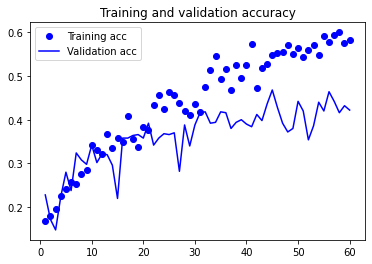

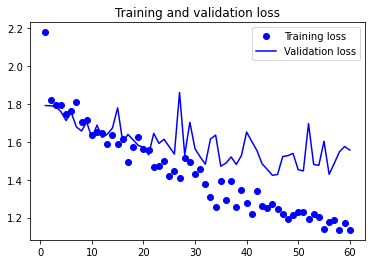

In [31]:
plot_loss_acc()

| Model Number  | Model Name | Optimal Epoch  | Validation Loss  | Validation Accuracy | 
| ------------ | ------------ | ------------ | ------------ | ------------ 
| 0 		| baseline  | N/A | N/A  | 16.66% |
| 1 |statistical power |  4  |1.4233  |46.80%| 

Following the build and train of the baseline model, I have found that the optimal number of epochs for this model is 45 where it reached the lowest value of validation loss at 1.4233 and reached the highest value of valuation accuracy at 0.4680, which translate into 46.80% of accuracy. 

Considering that the threshold for a correct random pick was 16.66%, it is undeniable that this model has statistical power. This model is capable of performing better than a dumb baseline, as the one set above, so I will continue to the next part of the universal workflow.

## **Part 6: Scaling up** <a class="anchor" id="part6"></a>

Having proved that the model has statistical power, it is time to greatly scale the model in order to find the point where validation starts overfits and therefore find this model optimal number of epochs. Epochs are the number of times that the network iterates over all samples. Knowning this will produce a model that will run enough times to prevent underfitting that will stop before reaching overfitting, therefore improving the efficiency of the network.

My scale up function will have more and bigger layers. As can be seen in the next block of code, this model definition have a stack of four Conv2D layers, each one followed by a MaxPooling2D layer, a flatten layer and two Dense layers at the bottom. The input arguments are the filters to each layer that it applies. In this model I will use 32, 64 and 128 filters. By doing so I make sure that the model will overfits.

In [32]:
model = build_model_outfits(32,64,128)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 64)      

In [39]:
model = train_epochs(model, 60)

Epoch 1/60
25/25 [==============================] - 23s 925ms/step - loss: 1.4541 - acc: 0.4220 - val_loss: 1.5224 - val_acc: 0.3900
Epoch 2/60
25/25 [==============================] - 22s 891ms/step - loss: 1.4224 - acc: 0.4160 - val_loss: 1.5040 - val_acc: 0.4020
Epoch 3/60
25/25 [==============================] - 22s 894ms/step - loss: 1.3983 - acc: 0.4420 - val_loss: 1.5154 - val_acc: 0.3960
Epoch 4/60
25/25 [==============================] - 22s 891ms/step - loss: 1.4684 - acc: 0.4160 - val_loss: 1.5032 - val_acc: 0.3940
Epoch 5/60
25/25 [==============================] - 22s 899ms/step - loss: 1.4555 - acc: 0.4320 - val_loss: 1.5008 - val_acc: 0.3680
Epoch 6/60
25/25 [==============================] - 22s 901ms/step - loss: 1.4128 - acc: 0.4520 - val_loss: 1.4619 - val_acc: 0.4200
Epoch 7/60
25/25 [==============================] - 22s 904ms/step - loss: 1.3946 - acc: 0.4560 - val_loss: 1.4757 - val_acc: 0.4220
Epoch 8/60
25/25 [==============================] - 22s 899ms/step - 

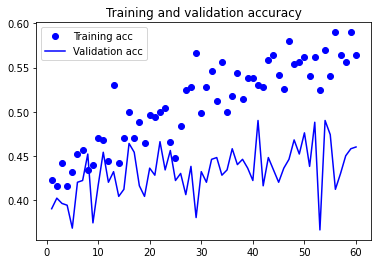

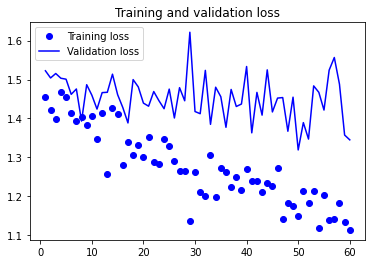

In [40]:
plot_loss_acc()

Two key values to look for: validation loss and validation accuracy. Validation loss measures how far off the network prediction is from the target whereas validation accuracy indicates how correctly the neural network predicted the emotion of a given image. For this classification problem success measure, the lower the validation loss the better for the reason that it shows that the optimizer is, effectively, lowering the loss, thus ensuring correct predictions. The optimal epoch is a balance between this two values.

The  lowest validation loss value was reached at epoch 50 whereas the highest validation accuracy was 49%, reached at epoch 41.

Here the optimal epoch was 50. This epoch was the one with lowest validation loss value: 1.3192. Epoch 50 had an accuracy of 47.60%, in line with the previous model. Despite having the same accuracy value as the previous model, this model reached that value with a lower validation loss which means improvement from the previous to the current model. 

Now that the overfitting model was discovered, I will start the last part of the universal workflow: regularize and tune.




## **Part 7: Regularizing and tuning** <a class="anchor" id="part7"></a>

In the last part of the universal workflow, I will tune and regulate the model.  By shifting the model’s hyperparameters, in line with the model’s performance as feedback, I expect to find the optimal model configuration.

I will explore:
*	Batch normalization
*	Dropout with different values for comparison
*	Learning rate with different values for comparison

For this 3 different aspects I will run distinct models, produce graphs and evaluate the impact on the current model’s performance. All the models will be trained for 60 epochs each.


### **Batch normalization model** <a class="anchor" id="batch"></a>

In this model I will use batch normalization.

Batch normalization seeks to "make different samples more similar to each other, this way helping the model to learn and generalize well to new data".[4] The main improvement produced by batch normalization is assisting with gradient propagation, enabling the use of deeper networks. Its layer usually sits after a convolutional or densely connected layer.

This model definition can be seen in the next code block.

In [41]:
model = build_model_batch(32, 64)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                      

In [35]:
model = train_epochs(model, 60)

Epoch 1/60
25/25 [==============================] - 30s 1s/step - loss: 4.7451 - acc: 0.2120 - val_loss: 4.5140 - val_acc: 0.1740
Epoch 2/60
25/25 [==============================] - 29s 1s/step - loss: 1.9089 - acc: 0.2000 - val_loss: 5.2928 - val_acc: 0.1600
Epoch 3/60
25/25 [==============================] - 29s 1s/step - loss: 2.1507 - acc: 0.1840 - val_loss: 7.1310 - val_acc: 0.1440
Epoch 4/60
25/25 [==============================] - 29s 1s/step - loss: 1.9389 - acc: 0.1600 - val_loss: 8.3322 - val_acc: 0.1440
Epoch 5/60
25/25 [==============================] - 29s 1s/step - loss: 1.9831 - acc: 0.1500 - val_loss: 5.8514 - val_acc: 0.1800
Epoch 6/60
25/25 [==============================] - 29s 1s/step - loss: 1.8964 - acc: 0.1760 - val_loss: 9.1040 - val_acc: 0.1640
Epoch 7/60
25/25 [==============================] - 29s 1s/step - loss: 1.8806 - acc: 0.2080 - val_loss: 8.8613 - val_acc: 0.1960
Epoch 8/60
25/25 [==============================] - 29s 1s/step - loss: 1.9564 - acc: 0.22

The batch normalization model performed worse that the previous model, scaling up model. Batch model increased validation loss roughly 0.26 marks and lost 13% in validation accuracy, when compared to outfits models.

The best epoch for validation loss was epoch 60: 1.5783 in validation loss and 33.20% in validation accuracy. This model had big peaks of validation loss, reaching 12.3972 at epoch 43; it seems that this model never actually reached an optimal epoch.

### **Dropout** <a class="anchor" id="drop"></a>

The next hyperparameter that I will tune is Dropout. 

Dropout is a technique to prevent accidental patterns. This is done by adding a dropout layer which will randomly set to zero a number of outputs features during a model training. This technique makes sure that no patterns will emerge since that the zeroed features are randomly selected. The number of outputs affected is dictated by the dropout rate. In my models I will use dropout rates of 0.2 and 0.4. This will translate in a drop of, respectively, 20% and 40% of output features set to zero.

Each model definition can be seen bellow. 

#### **Drop1 Model (20%)** <a class="anchor" id="drop1model"></a>

In [43]:
model = build_model_dropout(32, 64, 0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 64)      

In [44]:
model = train_epochs(model, 60)

Epoch 1/60
25/25 [==============================] - 23s 890ms/step - loss: 2.1379 - acc: 0.1840 - val_loss: 1.8070 - val_acc: 0.1660
Epoch 2/60
25/25 [==============================] - 22s 882ms/step - loss: 1.7967 - acc: 0.1660 - val_loss: 1.8072 - val_acc: 0.1300
Epoch 3/60
25/25 [==============================] - 22s 886ms/step - loss: 1.7911 - acc: 0.2300 - val_loss: 1.9000 - val_acc: 0.1500
Epoch 4/60
25/25 [==============================] - 22s 891ms/step - loss: 1.7997 - acc: 0.1940 - val_loss: 1.7604 - val_acc: 0.2640
Epoch 5/60
25/25 [==============================] - 22s 885ms/step - loss: 1.7961 - acc: 0.2220 - val_loss: 1.7243 - val_acc: 0.2420
Epoch 6/60
25/25 [==============================] - 22s 884ms/step - loss: 1.7351 - acc: 0.2700 - val_loss: 1.7015 - val_acc: 0.2780
Epoch 7/60
25/25 [==============================] - 22s 887ms/step - loss: 1.7033 - acc: 0.2720 - val_loss: 1.6911 - val_acc: 0.2980
Epoch 8/60
25/25 [==============================] - 22s 888ms/step - 

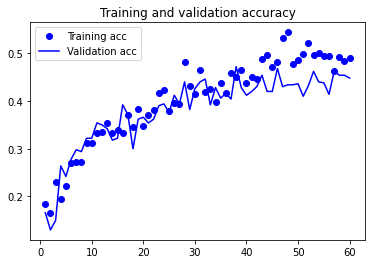

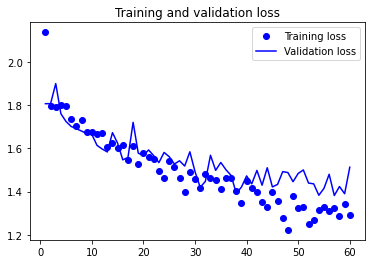

In [45]:
plot_loss_acc()

#### **Drop2 Model (40%)** <a class="anchor" id="drop2model"></a>

In [46]:
model = build_model_dropout(32, 64, 0.4)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 17, 17, 64)      

In [47]:
model = train_epochs(model, 60)

Epoch 1/60
25/25 [==============================] - 23s 902ms/step - loss: 1.9927 - acc: 0.1600 - val_loss: 1.7902 - val_acc: 0.1820
Epoch 2/60
25/25 [==============================] - 22s 893ms/step - loss: 1.7950 - acc: 0.2080 - val_loss: 1.7881 - val_acc: 0.1820
Epoch 3/60
25/25 [==============================] - 22s 893ms/step - loss: 1.8005 - acc: 0.1800 - val_loss: 1.7882 - val_acc: 0.1880
Epoch 4/60
25/25 [==============================] - 30s 1s/step - loss: 1.7983 - acc: 0.1760 - val_loss: 1.7889 - val_acc: 0.1540
Epoch 5/60
25/25 [==============================] - 22s 890ms/step - loss: 1.7848 - acc: 0.2460 - val_loss: 1.7657 - val_acc: 0.2060
Epoch 6/60
25/25 [==============================] - 22s 888ms/step - loss: 1.7773 - acc: 0.2400 - val_loss: 1.7239 - val_acc: 0.2780
Epoch 7/60
25/25 [==============================] - 23s 943ms/step - loss: 1.7809 - acc: 0.2400 - val_loss: 1.7198 - val_acc: 0.2620
Epoch 8/60
25/25 [==============================] - 22s 884ms/step - los

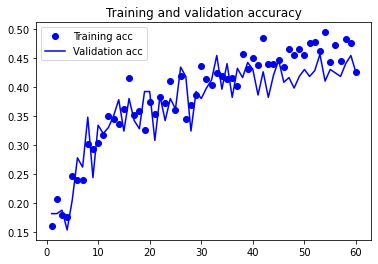

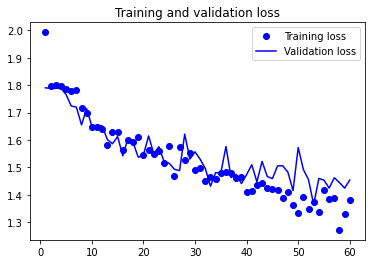

In [48]:
plot_loss_acc()

#### **Dropout models comparison** <a class="anchor" id="dropcomparison"></a>

| Model Number  | Model Name | Optimal Epoch  | Validation Loss  | Validation Accuracy | 
| ------------ | ------------ | ------------ | ------------ | ------------ 
| 4 |drop1 (0.2) |  57  |1.3818  |46.20%| 
| 5 |drop2 (0.4) |  53  |1.3644  |45.60%| 



In the side by side comparison, it is clear that model drop2 had a better validation loss value compared to model drop1, therefore the more sucessfull according to my measure of sucess defined in Part 2.
Compared to the batch normalization model, drop2 clearing improved both validation loss and accuracy.

### **Tunning the learning rate** <a class="anchor" id="learning"></a>

The third and final hyperparameter tuned is the learning rate of the optimizer.

The learning rate of the chosen optimizer will regulate how the weights of the network are updated in relation to the validation loss. Its default value is 0.001. I will experiment two different values: 0.005 and 0.1. By having this range of learning rate I expect to better understand the best value to find the optimal set of weights. Both model will have a dropout rate of 0.2.

The models definition can be seen in the following blocks of code.

#### **LR1 Model (0.005)** <a class="anchor" id="lr1model"></a>

In [51]:
model = build_model_learning_rate(32,64,0.2,0.005)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 64)      

In [52]:
model = train_epochs(model, 60)

Epoch 1/60
25/25 [==============================] - 27s 1s/step - loss: 8.1802 - acc: 0.1300 - val_loss: 1.7937 - val_acc: 0.1420
Epoch 2/60
25/25 [==============================] - 23s 927ms/step - loss: 1.8218 - acc: 0.1880 - val_loss: 1.8141 - val_acc: 0.1600
Epoch 3/60
25/25 [==============================] - 22s 895ms/step - loss: 1.7971 - acc: 0.1800 - val_loss: 1.8023 - val_acc: 0.1900
Epoch 4/60
25/25 [==============================] - 23s 909ms/step - loss: 1.8623 - acc: 0.1640 - val_loss: 1.7964 - val_acc: 0.1740
Epoch 5/60
25/25 [==============================] - 22s 901ms/step - loss: 1.8006 - acc: 0.1400 - val_loss: 1.7916 - val_acc: 0.1760
Epoch 6/60
25/25 [==============================] - 22s 879ms/step - loss: 1.8148 - acc: 0.1700 - val_loss: 1.7920 - val_acc: 0.1720
Epoch 7/60
25/25 [==============================] - 22s 889ms/step - loss: 1.8075 - acc: 0.1640 - val_loss: 1.7914 - val_acc: 0.1540
Epoch 8/60
25/25 [==============================] - 22s 893ms/step - los

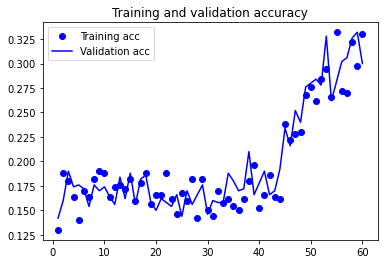

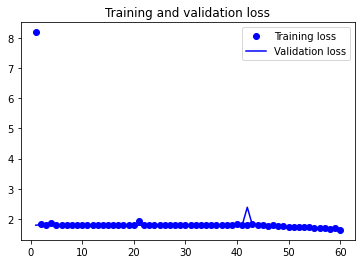

In [53]:
plot_loss_acc()

#### **LR2 Model (0.1)** <a class="anchor" id="lr2model"></a>

In [54]:
model = build_model_learning_rate(32,64,0.2,0.1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 17, 17, 64)     

In [55]:
model = train_epochs(model, 60)

Epoch 1/60
25/25 [==============================] - 24s 900ms/step - loss: 1260917.6250 - acc: 0.1400 - val_loss: 1.8608 - val_acc: 0.1660
Epoch 2/60
25/25 [==============================] - 22s 895ms/step - loss: 1.8437 - acc: 0.1660 - val_loss: 1.8743 - val_acc: 0.1560
Epoch 3/60
25/25 [==============================] - 22s 896ms/step - loss: 1.8155 - acc: 0.1660 - val_loss: 1.8341 - val_acc: 0.1740
Epoch 4/60
25/25 [==============================] - 22s 886ms/step - loss: 1.8056 - acc: 0.1800 - val_loss: 1.8005 - val_acc: 0.1500
Epoch 5/60
25/25 [==============================] - 22s 886ms/step - loss: 1.8012 - acc: 0.1760 - val_loss: 1.7975 - val_acc: 0.1720
Epoch 6/60
25/25 [==============================] - 22s 890ms/step - loss: 1.8106 - acc: 0.1480 - val_loss: 1.7926 - val_acc: 0.1680
Epoch 7/60
25/25 [==============================] - 22s 888ms/step - loss: 1.7970 - acc: 0.1620 - val_loss: 1.7965 - val_acc: 0.1780
Epoch 8/60
25/25 [==============================] - 22s 884ms/s

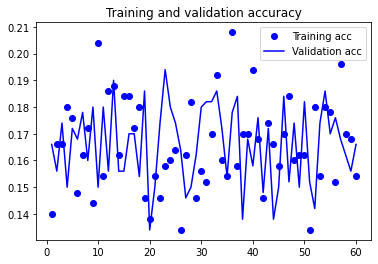

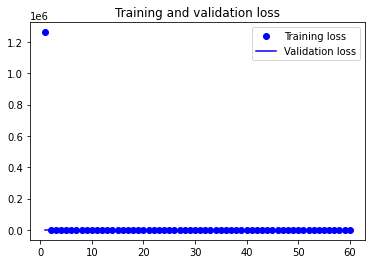

In [56]:
plot_loss_acc()

#### **Learning rate models comparison** <a class="anchor" id="learncomparison"></a>

| Model Number  | Model Name | Optimal Epoch  | Validation Loss  | Validation Accuracy | 
| ------------ | ------------ | ------------ | ------------ | ------------ 
| 6 |lr1 (0.005) |  59  |1.6382  |33.20%| 
| 7 | lr2 (0.1) |   10  |   1.7878  |   18.00%|



It is obvious that model LR1 is the best of the two learning rate models trained, for it had the lowest validation loss. In my opinion LR2 skipped over the global mininum, hence the very poor results.

Addtionally, both learning rate models performed poorly when compared with the previous hyperparameter models, dropout.

## **Results comparison** <a class="anchor" id="results"></a>

Next, I have gathered all the results for the 7 models created.

| Model Number  | Model Name | Optimal Epoch  | Validation Loss  | Validation Accuracy | 
| ------------ | ------------ | ------------ | ------------ | ------------ 
| 0 		| Baseline  | N/A | N/A |   16.66%|
| 1 |Statistical power |  4  |1.4233|   46.80%| 
| 2 | Outfits   |   50  |   1.3192  |   46.80%| 
| 3 | Batch     |   25  |   1.5783  |   33.20%|
| 4 |Drop1 (0.2)|   57  |   1.3818  |   46.20%| 
| 5 |Drop2 (0.4)|   53  |   1.3644  |   45.60%| 
| 6 |LR1 (0.005)|   59  |   1.6382  |   33.20%| 
| 7 | LR2 (0.1) |   10  |   1.7878  |   18.00%|

From the model comparison table above, several conclusions can be produced. All the models trained for 60 epochs, on a balanced dataset. From the 7 models trained, I acknowledge that: 

*	The average validation accuracy was 38.43%
*	The average validation loss was 1.499
*	Out of the three hyperparameters explored, Dropout achieved the best results.
*	Model Outfits got the lowest validation loss and the highest validation accuracy.

It is natural then for model outfits to be chosen as the final model.


### **Final model** <a class="anchor" id="finalmodel"></a>

With the results produced and evaluated, outfits model was picked as the best model to be used as final model, with 32,64 and 128 as arguments. I will train for the optimal number of epochs: 50.

In [58]:
final_model = build_model_outfits(32,64,128)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 17, 17, 64)     

In [59]:
history = train_final(final_model, 50)

Epoch 1/50
25/25 [==============================] - 21s 739ms/step - loss: 1.8238 - acc: 0.1720
Epoch 2/50
25/25 [==============================] - 18s 739ms/step - loss: 1.7935 - acc: 0.1800
Epoch 3/50
25/25 [==============================] - 18s 735ms/step - loss: 1.7933 - acc: 0.1780
Epoch 4/50
25/25 [==============================] - 18s 738ms/step - loss: 1.7951 - acc: 0.1440
Epoch 5/50
25/25 [==============================] - 19s 740ms/step - loss: 1.7945 - acc: 0.1840
Epoch 6/50
25/25 [==============================] - 18s 734ms/step - loss: 1.7658 - acc: 0.2520
Epoch 7/50
25/25 [==============================] - 18s 732ms/step - loss: 1.7271 - acc: 0.3100
Epoch 8/50
25/25 [==============================] - 18s 734ms/step - loss: 1.7181 - acc: 0.2500
Epoch 9/50
25/25 [==============================] - 18s 735ms/step - loss: 1.6936 - acc: 0.2960
Epoch 10/50
25/25 [==============================] - 18s 735ms/step - loss: 1.6843 - acc: 0.3120
Epoch 11/50
25/25 [====================

In [60]:
test_loss, test_acc = final_model.evaluate(test_generator, steps=50)

# print final model accuracy
print('test acc:', test_acc)

50/50 [==============================] - 10s 206ms/step - loss: 1.4041 - acc: 0.4430
test acc: 0.4429999887943268


Having buid and train the final model, the outputs show an accuracy of 47.80% in epoch 44 of 50. Additionally, final model got the lowest loss of 1.3175.
When compared to the results of outfits model, a slight improvement is clear, both in loss (-0.0017) and accuracy (+1%).

After testing the final model on unseen data, loss increased to 1.4041 (+0.0866) and accuracy dropped to 44.30% (-3.5%). In perspective, both values are improvements to the average validation loss and validation accuracy values of the 7 models trained. 

## **Conclusion** <a class="anchor" id="conclusion"></a>

In the end of this coursework, I feel that I have learned immensely.
I chose to use a external dataset and worked it in what I believed was the best way to produce the best result from all the data samples present in the dataset.

Maybe a better result would be reached if more models would have been trained with different hyperparamenters and/or different values on the already trained hyperparamenters. In all the models trained, the optimal point of training was not always easy to spot due to high peeks on value in both training and validation loss and accuracy. 

Since this was a multiclass single label classification, I am satisfied with the result and I will apply all the knowledge gathered in this coursework to produce better neural networks in the future.



## **References** <a class="anchor" id="references"></a>

[1] Norman, J., 2022. Invention of the Image Scanner; Creation of the First Digital Image : History of Information. [online] Historyofinformation.com. 
Available at: <https://www.historyofinformation.com/detail.php?entryid=2332> [Accessed 21 January 2022].

[2] Ibm.com. 2022. What is Computer Vision? | IBM. [online] Available at: <https://www.ibm.com/topics/computer-vision> [Accessed 19 January 2022].

[3] Chollet, F., 2021. Deep Learning with Python, Second Edition. 2nd ed. Shelter Island, NY: Manning Publications, pp.111-115.

[4] Chollet, F., 2021. Deep Learning with Python, Second Edition. 2nd ed. Shelter Island, NY: Manning Publications, pp.260.
